## 뉴스 주제 분류 분석

In [261]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from konlpy.tag import Twitter
import lightgbm as lgb
import requests
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

In [258]:
def news_data_setting():
    News = pd.read_csv("인공지능 관련 뉴스메타데이터(2013.01.01-2017.08.31).CSV", encoding="cp949")
    News = News.filter(items=["제목","통합 분류1","본문","특성추출"])
    News = News[News['통합 분류1'].notna()]
    News['통합 분류1'] = News['통합 분류1'].replace("경제>국제경제", "경제>경경")
    
    IT = News[News['통합 분류1'].str.contains("IT_과학>")]
    eco = News[News['통합 분류1'].str.contains("경제")]
    spo = News[News['통합 분류1'].str.contains("스포츠>")]
    wol = News[News['통합 분류1'].str.contains("국제")]
    con = News[News['통합 분류1'].str.contains("지역>")]
    so = News[News['통합 분류1'].str.contains("사회")]
    book = News[News['통합 분류1'].str.contains("문화")]
    soc = News[News['통합 분류1'].str.contains("정치")]
    
    IT['class'] = "과학"
    IT['category'] = 1

    eco['class'] = "경제"
    eco['category'] = 2

    spo['class'] = "스포츠"
    spo['category'] = 3

    wol['class'] = "국제"
    wol['category'] = 4

    con['class'] = "지역"
    con['category'] = 5

    so['class'] = "사회"
    so['category'] = 6

    book['class'] = "문학"
    book['category'] = 7

    soc['class'] = "정치"
    soc['category'] = 8
    
    total = pd.concat([IT,eco,spo,wol,con,so,book,soc]).reset_index(drop=True)
    
    return total

total = news_data_setting()

In [257]:
total.tail()

,제목,통합 분류1,본문,특성추출,class,category
45370,일자리·4차 산업혁명·교육…위원회는 `文정부 거울`,정치>청와대,◆ 레이더뉴스 / 文정부 위원회 大해부 ◆ 문재인 대통령이 국정 5개년 계획을 차...,"위원회,청와대,4차,위원장,다음달,일자리,저출산,문재인,북방경제협력위원회,대타협,광...",정치,8
45371,"냉랭한 한일관계, 어떻게 풀어지려나",정치>외교,"우리는 지난 15일 광복 72주년을 보내고, 이제 29일 경술국치일을 맞는다. ...","일본,한일관계,한국,한일,고노,양국간,위안부,문재인,선린,백제,관광객,한국사회,주력...",정치,8
45372,문 대통령 “설계수명 다한 노후원전 연장가동 안한다”,정치>외교,문재인 대통령이 “원전과 화력발전을 줄이고 안전한 미래에너지를 늘려야 한다”고 거듭...,"미국,자유무역협정,중국,기업인,발전소,위원장,사드,경제협력,지방자치단체,신재생,7기...",정치,8
45373,[편집국에서] 사이다만 먹고 살 순 없다,정치>청와대,“공정거래위원회가 (국민들의) 막힌 곳을 뚫어주는 사이다 역할을 하고 있다.” 문재...,"한국,세월호,공정위,기간제,국민들,1류,저성장,가처분,박일근,3류,빅데이터,4차,운...",정치,8
45374,“수직적 권력분산 위해 자치분권 실현 중요”,정치,정순관 대통령소속 지방자치발전위원장은 29일 “자치분권은 시대적 흐름에 부응하는 핵...,"위원장,지방분권,정순관,4차,제2국무회의,지방세,권력분산,수직적,지방이양,인공지능,...",정치,8


---

### news 제목

In [286]:
from konlpy.tag import Twitter
from konlpy.tag import *
hannanum = Hannanum()
kkma = Kkma()
twitter = Twitter()

def tokenize_pos(doc):
    return ['/'.join(t) for t in twitter.pos(doc)]

In [287]:
clf = Pipeline([
    ("vect", TfidfVectorizer(tokenizer=tokenize_pos, ngram_range=(1,1))), 
    ("clf", MultinomialNB(alpha=0.01))
])

In [288]:
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(total['제목'], total['category'], \
                                                    test_size=0.4, random_state=0)

len(X_train_a),len(X_test_a),len(y_train_a),len(y_test_a)

(27225, 18150, 27225, 18150)

In [289]:
def news_name():
    model_a = clf.fit(X_train_a, y_train_a)
    
    y_pred_a = model_a.predict(X_train_a)
    
    print("Train", "\n")
    print("Train confusion_matrix", "\n")
    print(confusion_matrix(y_train_a, y_pred_a), "\n\n")
    print("Train classification_report", "\n")
    print(classification_report(y_train_a, y_pred_a), "\n\n")
    print("Train accuracy_score", "\n")
    print(round(accuracy_score(y_train_a, y_pred_a), 2), "\n\n")
    
    print("=====================================================" , "\n\n")
    
    y_pred_a_T = model_a.predict(X_test_a)
    
    print("Test", "\n")
    print("Test confusion_matrix", "\n")
    print(confusion_matrix(y_test_a, y_pred_a_T), "\n\n")
    print("Test classification_report", "\n")
    print(classification_report(y_test_a, y_pred_a_T), "\n\n")
    print("Test accuracy_score", "\n")
    print(round(accuracy_score(y_test_a, y_pred_a_T), 2), "\n\n")
    
    x="Train","Test"
    y=accuracy_score(y_train_a, y_pred_a), accuracy_score(y_test_a, y_pred_a_T)
    plt.bar(x,y)
    plt.show()

Train 

Train confusion_matrix 

[[11991   621    18    53    21    22   190    12]
 [ 1423  6138     2    16    24     5    31    20]
 [   25     1   242     9     0     0    15     0]
 [  171    56     5   713     0     2    19    10]
 [  119    46     1     1   467     3    11     2]
 [  191    29     2     2     6   809    32     9]
 [  386    41    19    12     5    17  2464     2]
 [   57    21     0     3     3     0     1   609]] 


Train classification_report 

             precision    recall  f1-score   support

          1       0.83      0.93      0.88     12928
          2       0.88      0.80      0.84      7659
          3       0.84      0.83      0.83       292
          4       0.88      0.73      0.80       976
          5       0.89      0.72      0.79       650
          6       0.94      0.75      0.83      1080
          7       0.89      0.84      0.86      2946
          8       0.92      0.88      0.90       694

avg / total       0.86      0.86      0.86    

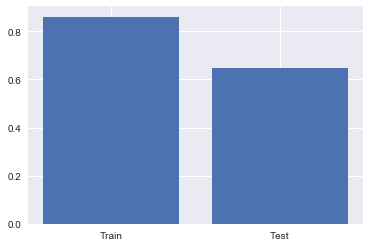

In [290]:
news_name()

---

### news 특성추출

In [279]:
from konlpy.tag import Twitter
from konlpy.tag import *
hannanum = Hannanum()
kkma = Kkma()
twitter = Twitter()

def tokenize_pos(doc):
    return ['/'.join(t) for t in twitter.pos(doc)]

In [280]:
clf = Pipeline([
    ("vect", TfidfVectorizer(tokenizer=tokenize_pos, ngram_range=(1,1))), 
    ("clf", MultinomialNB(alpha=0.01))
])

In [281]:
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(total['특성추출'], total['category'], \
                                                    test_size=0.4, random_state=0)

len(X_train_a),len(X_test_a),len(y_train_a),len(y_test_a)

(27225, 18150, 27225, 18150)

In [283]:
def news_cha():
    model_a = clf.fit(X_train_a, y_train_a)
    
    y_pred_a = model_a.predict(X_train_a)
    
    print("Train", "\n")
    print("Train confusion_matrix", "\n")
    print(confusion_matrix(y_train_a, y_pred_a), "\n\n")
    print("Train classification_report", "\n")
    print(classification_report(y_train_a, y_pred_a), "\n\n")
    print("Train accuracy_score", "\n")
    print(round(accuracy_score(y_train_a, y_pred_a), 2), "\n\n")
    
    print("=====================================================" , "\n\n")
    
    y_pred_a_T = model_a.predict(X_test_a)
    
    print("Test", "\n")
    print("Test confusion_matrix", "\n")
    print(confusion_matrix(y_test_a, y_pred_a_T), "\n\n")
    print("Test classification_report", "\n")
    print(classification_report(y_test_a, y_pred_a_T), "\n\n")
    print("Test accuracy_score", "\n")
    print(round(accuracy_score(y_test_a, y_pred_a_T), 2), "\n\n")
    
    x="Train","Test"
    y=accuracy_score(y_train_a, y_pred_a), accuracy_score(y_test_a, y_pred_a_T)
    plt.bar(x,y)
    plt.show()

Train 

Train confusion_matrix 

[[11925   624    43    65    49    61   149    12]
 [ 1169  6378     6    11    43    14    20    18]
 [    7     1   272     8     1     0     3     0]
 [   97    50    13   799     0     2     7     8]
 [   45    26     2     3   559     4     8     3]
 [   93    29     9     7     6   918    15     3]
 [  239    29    27    18     8    22  2601     2]
 [   28    15     1     1     3     0     2   644]] 


Train classification_report 

             precision    recall  f1-score   support

          1       0.88      0.92      0.90     12928
          2       0.89      0.83      0.86      7659
          3       0.73      0.93      0.82       292
          4       0.88      0.82      0.85       976
          5       0.84      0.86      0.85       650
          6       0.90      0.85      0.87      1080
          7       0.93      0.88      0.90      2946
          8       0.93      0.93      0.93       694

avg / total       0.89      0.89      0.88    

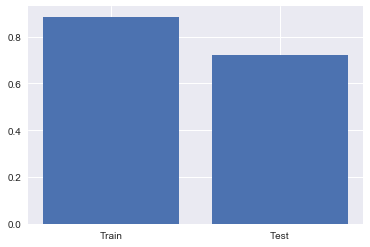

In [284]:
news_cha()

---

### news 본문

In [262]:
from konlpy.tag import Twitter
from konlpy.tag import *
hannanum = Hannanum()
kkma = Kkma()
twitter = Twitter()

def tokenize_pos(doc):
    return ['/'.join(t) for t in twitter.pos(doc)]

In [263]:
clf = Pipeline([
    ("vect", TfidfVectorizer(tokenizer=tokenize_pos, ngram_range=(1,2))), 
    ("clf", MultinomialNB(alpha=0.01))
])

In [264]:
X_train_F, X_test_F, y_train_F, y_test_F = train_test_split(total['본문'], total['category'], \
                                                    test_size=0.4, random_state=0)

len(X_train_F),len(X_test_F),len(y_train_F),len(y_test_F)

(27225, 18150, 27225, 18150)

In [265]:
def news_con():
    model_F = clf.fit(X_train_F, y_train_F)
    
    y_pred_F = model_F.predict(X_train_F)
    
    print("Train", "\n")
    print("Train confusion_matrix", "\n")
    print(confusion_matrix(y_train_F, y_pred_F), "\n\n")
    print("Train classification_report", "\n")
    print(classification_report(y_train_F, y_pred_F), "\n\n")
    print("Train accuracy_score", "\n")
    print(round(accuracy_score(y_train_F, y_pred_F), 2), "\n\n")
    
    print("=====================================================" , "\n\n")
    
    y_pred_F_T = model_F.predict(X_test_F)
    
    print("Test", "\n")
    print("Test confusion_matrix", "\n")
    print(confusion_matrix(y_test_F, y_pred_F_T), "\n\n")
    print("Test classification_report", "\n")
    print(classification_report(y_test_F, y_pred_F_T), "\n\n")
    print("Test accuracy_score", "\n")
    print(round(accuracy_score(y_test_F, y_pred_F_T), 2), "\n\n")
    
    x="Train","Test"
    y=accuracy_score(y_train_F, y_pred_F), accuracy_score(y_test_F, y_pred_F_T)
    plt.bar(x,y)
    plt.show()

Train 

Train confusion_matrix 

[[12642   106    11    43    25    19    78     4]
 [   62  7555     4     5    11     2    13     7]
 [    1     1   288     2     0     0     0     0]
 [    5     8     1   957     0     1     1     3]
 [    4     3     2     2   633     0     5     1]
 [    3     4     3     1     3  1063     1     2]
 [   18     3     2     1     2     3  2917     0]
 [    2     1     0     0     1     0     0   690]] 


Train classification_report 

             precision    recall  f1-score   support

          1       0.99      0.98      0.99     12928
          2       0.98      0.99      0.99      7659
          3       0.93      0.99      0.96       292
          4       0.95      0.98      0.96       976
          5       0.94      0.97      0.96       650
          6       0.98      0.98      0.98      1080
          7       0.97      0.99      0.98      2946
          8       0.98      0.99      0.99       694

avg / total       0.98      0.98      0.98    

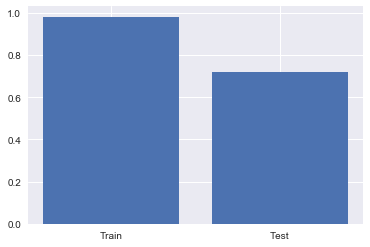

In [266]:
news_con()

---

### news 본문 + 특성추출 + 제목

In [301]:
def data_resetting():
    total_ = total.filter(items=['본문',"class",'category'])
    total_ = total_.rename(columns={"본문":"cont"})
    total__ = total.filter(items=['특성추출',"class",'category'])
    total__ = total__.rename(columns={"특성추출":"cont"})
    total___ = total.filter(items=['제목',"class",'category'])
    total___ = total___.rename(columns={"제목":"cont"})
    
    t_total = pd.concat([total_,total__,total___]).reset_index(drop=True)
    
    return t_total

t_total = data_resetting()

In [302]:
t_total.tail()

,cont,class,category
136120,일자리·4차 산업혁명·교육…위원회는 `文정부 거울`,정치,8
136121,"냉랭한 한일관계, 어떻게 풀어지려나",정치,8
136122,문 대통령 “설계수명 다한 노후원전 연장가동 안한다”,정치,8
136123,[편집국에서] 사이다만 먹고 살 순 없다,정치,8
136124,“수직적 권력분산 위해 자치분권 실현 중요”,정치,8


In [303]:
from konlpy.tag import Twitter
from konlpy.tag import *
hannanum = Hannanum()
kkma = Kkma()
twitter = Twitter()

def tokenize_pos(doc):
    return ['/'.join(t) for t in twitter.pos(doc)]

In [304]:
clf = Pipeline([
    ("vect", TfidfVectorizer(tokenizer=tokenize_pos, ngram_range=(1,1))), 
    ("clf", MultinomialNB(alpha=0.01))
])

In [305]:
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(t_total['cont'], t_total['category'], \
                                                    test_size=0.4, random_state=0)

len(X_train_a),len(X_test_a),len(y_train_a),len(y_test_a)

(81675, 54450, 81675, 54450)

In [306]:
def total():
    model_a = clf.fit(X_train_a, y_train_a)
    
    y_pred_a = model_a.predict(X_train_a)
    
    print("Train", "\n")
    print("Train confusion_matrix", "\n")
    print(confusion_matrix(y_train_a, y_pred_a), "\n\n")
    print("Train classification_report", "\n")
    print(classification_report(y_train_a, y_pred_a), "\n\n")
    print("Train accuracy_score", "\n")
    print(round(accuracy_score(y_train_a, y_pred_a), 2), "\n\n")
    
    print("=====================================================" , "\n\n")
    
    y_pred_a_T = model_a.predict(X_test_a)
    
    print("Test", "\n")
    print("Test confusion_matrix", "\n")
    print(confusion_matrix(y_test_a, y_pred_a_T), "\n\n")
    print("Test classification_report", "\n")
    print(classification_report(y_test_a, y_pred_a_T), "\n\n")
    print("Test accuracy_score", "\n")
    print(round(accuracy_score(y_test_a, y_pred_a_T), 2), "\n\n")
    
    x="Train","Test"
    y=accuracy_score(y_train_a, y_pred_a), accuracy_score(y_test_a, y_pred_a_T)
    plt.bar(x,y)
    plt.show()

In [ ]:
total()